In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_instructions(input_txt):
    with open(input_txt) as f:
        lines = f.read().strip().split('\n')

    X  = 1
    Xs = [X]
    for line in lines:
        x = 0
        instructions = line.split(' ')
        instruction  = instructions[0]
        if instruction == 'addx':
            x = int(instructions[1])
            Xs.append(X)
            Xs.append(X)
            X += x
        elif instruction == 'noop':
            Xs.append(X)
    #print(f"{Xs}")
    #print(f"at the beginning of {len(Xs)}th cycle, X={X}")
    return Xs, X

In [3]:
## part 1.
def calc_signal_strengths(Xs):
    signal_strengths = np.zeros(np.shape(Xs)).astype(int)
    for i, X in enumerate(Xs):
        signal_strengths[i] = i*X
    return signal_strengths

Xs, X = load_instructions('input.txt')
signal_strengths = calc_signal_strengths(Xs)
signal_strength_total = 0
for i in [20, 60, 100, 140, 180, 220]:
    signal_strength_total += signal_strengths[i]
print(f"The sum of the signal strength of 20th, 60th, 100th, 140th, 180th, and 220th cycles:")
print(signal_strength_total)

The sum of the signal strength of 20th, 60th, 100th, 140th, 180th, and 220th cycles:
13220


[[1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0]
 [1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0]]


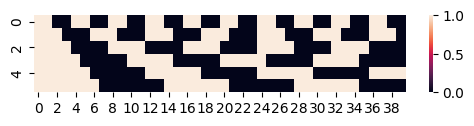

In [3]:
## part 2.
Xs, _ = load_instructions('input_test2.txt')

# CRT field.
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))
field = np.zeros((6, 40)).astype(int)

# one line of CRT screen.
CRTline = np.arange(40)

for n_cycle in range(len(Xs)-1):
    row = (n_cycle-1) // 40
    col = (n_cycle-1) % 40
    
    x = Xs[n_cycle]
    
    # sprite.
    overlap = list(set(CRTline) & set([x-1, x, x+1]))
    
    if col in overlap:
        field[row, col] = 1
    #print(f"{row},{col} = {x}: {overlap}: {col in overlap}")

# display the result.
print(field)
plt.figure(figsize=(6, 1))
ax = sns.heatmap(field, vmin=0, vmax=1)
plt.show()